Bagian 1: Import Library dan Load Dataset

In [1]:
# Bagian 1: Import Library dan Load Dataset
# Tujuan: Mengimpor pustaka yang diperlukan dan memuat data "clusteringweek06.csv" untuk clustering.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('clusteringweek06.csv')

# Menampilkan informasi dasar tentang dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-null   float64
dtype

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


Bagian 2: Data Preprocessing - Standarisasi Data

In [2]:
# Bagian 2: Standarisasi Data
# Tujuan: Untuk menstandarisasi dataset sehingga fitur berada pada skala yang serupa, yang penting untuk algoritma clustering.

# Inisialisasi StandardScaler dan menerapkannya ke dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Konversi hasil scaling kembali ke dalam DataFrame untuk kemudahan
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Menampilkan data standar untuk konfirmasi
# Insight: Standarisasi memastikan setiap fitur memiliki bobot yang setara dalam proses clustering.
scaled_df.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,0.146578,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,-1.287190,-1.672333,0.540390,...,-1.485897,0.796627,1.265956,-0.551081,-1.427291,-1.007678,0.483477,1.177905,1.023939,-0.595699
1,0.146578,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,-1.909853,-1.876612,0.903961,...,-1.959178,0.406743,1.412903,-0.250524,-1.301412,-0.758490,0.171681,0.779239,0.565657,-0.474036
2,0.146578,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,-2.079764,-1.940639,1.389091,...,-1.877203,0.590374,1.647536,0.345883,-1.009606,-0.369957,-0.208962,0.299030,0.777644,-0.084297
3,0.146578,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,-1.667990,-1.264799,1.686808,...,-2.262481,0.181478,1.077586,-0.769643,-1.627648,-2.181026,-0.981638,-0.016165,-0.704780,-0.515365
4,0.146578,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,-2.279164,-1.681117,1.655798,...,-2.172759,0.502823,1.710511,0.173262,-0.996517,-0.717936,-0.473426,0.232532,0.897212,-0.067430


Bagian 3: Mendefinisikan Fungsi Evaluasi Clustering

In [3]:
# Bagian 3: Mendefinisikan Fungsi Evaluasi Clustering
# Tujuan: Untuk mengevaluasi model clustering menggunakan Elbow, Silhouette Score, Davies-Bouldin Index, dan Calinski-Harabasz Index.

def evaluate_clustering(data, model, model_name, k_range=range(2, 11)):
    """Evaluasi model clustering menggunakan Elbow (Knee), Silhouette Score, Davies-Bouldin Index, dan Calinski-Harabasz Index."""

    inertias = []          # Untuk Elbow (Knee)
    silhouettes = []       # Untuk Silhouette Score
    davies_bouldins = []   # Untuk Davies-Bouldin Index
    calinski_harabaszs = [] # Untuk Calinski-Harabasz Index

    # Iterasi pada rentang jumlah cluster
    for k in k_range:
        clustering_model = model(n_clusters=k)
        labels = clustering_model.fit_predict(data)

        # Menghitung inertia untuk Elbow (khusus KMeans) atau total jarak untuk model lain
        if model_name == 'K-Means':
            inertias.append(clustering_model.inertia_)
        else:
            centroids = [data[labels == cluster].mean(axis=0) for cluster in range(k)]
            inertia = np.sum([cdist([centroids[label]], [point], 'euclidean').sum()
                              for label, point in zip(labels, data)])
            inertias.append(inertia)

        # Menghitung Silhouette Score
        silhouettes.append(silhouette_score(data, labels))

        # Menghitung Davies-Bouldin Index
        davies_bouldins.append(davies_bouldin_score(data, labels))

        # Menghitung Calinski-Harabasz Index
        calinski_harabaszs.append(calinski_harabasz_score(data, labels))

    # Menampilkan grafik Elbow (Knee) dan Silhouette Score
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(k_range, inertias, marker='o')
    ax[0].set_title(f'Elbow Method for {model_name}')
    ax[0].set_xlabel('Number of Clusters')
    ax[0].set_ylabel('Inertia')

    ax[1].plot(k_range, silhouettes, marker='o', color='orange')
    ax[1].set_title(f'Silhouette Score for {model_name}')
    ax[1].set_xlabel('Number of Clusters')
    ax[1].set_ylabel('Silhouette Score')

    plt.show()

    # Menampilkan Davies-Bouldin dan Calinski-Harabasz sebagai tambahan metrik
    print(f"Davies-Bouldin Index for {model_name}: {davies_bouldins}")
    print(f"Calinski-Harabasz Index for {model_name}: {calinski_harabaszs}")

    # Menampilkan jumlah cluster optimal berdasarkan Silhouette Score tertinggi
    optimal_k = k_range[np.argmax(silhouettes)]
    print(f"Optimal jumlah cluster untuk {model_name} adalah: {optimal_k}")


Bagian 4: Evaluasi K-Means Clustering

Evaluating K-Means Clustering...


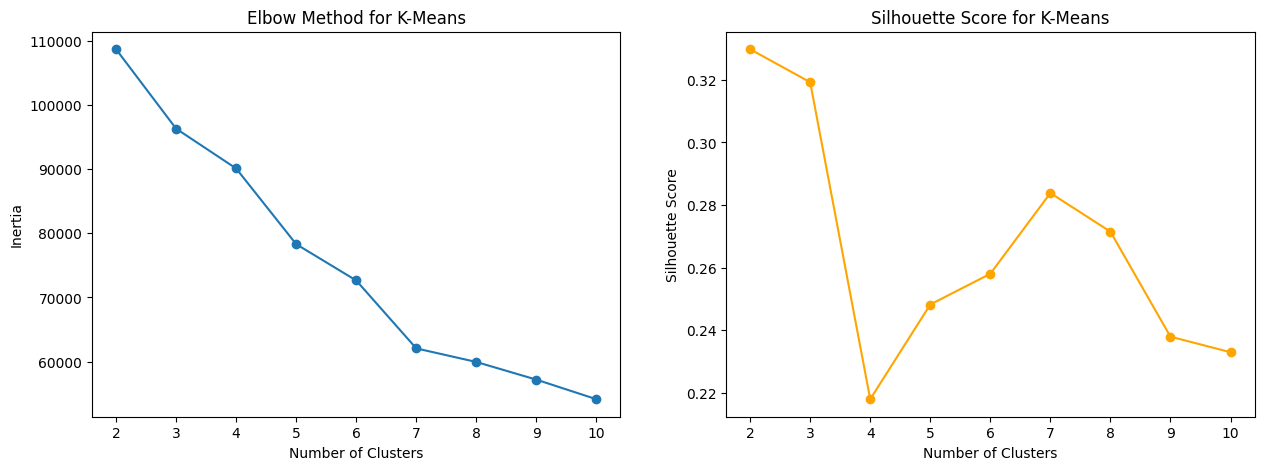

Davies-Bouldin Index for K-Means: [1.308098851611407, 1.8580080680054074, 1.2792984680235202, 1.4802921719661142, 1.5944085710550302, 1.3067603430195032, 1.471042809259079, 1.5548781515503132, 1.483983435040945]
Calinski-Harabasz Index for K-Means: [3284.6059253559797, 2315.04758011003, 1814.550142152466, 1836.243146687879, 1695.169525696787, 1857.4616925925034, 1684.2872458964239, 1587.683208112901, 1535.5292954885238]
Optimal jumlah cluster untuk K-Means adalah: 2


In [4]:
# Evaluasi K-Means Clustering
print("Evaluating K-Means Clustering...")
evaluate_clustering(scaled_df.values, KMeans, "K-Means")


Bagian 5: Evaluasi Euclidean Clustering (Agglomerative Clustering)

Evaluating Euclidean Clustering...


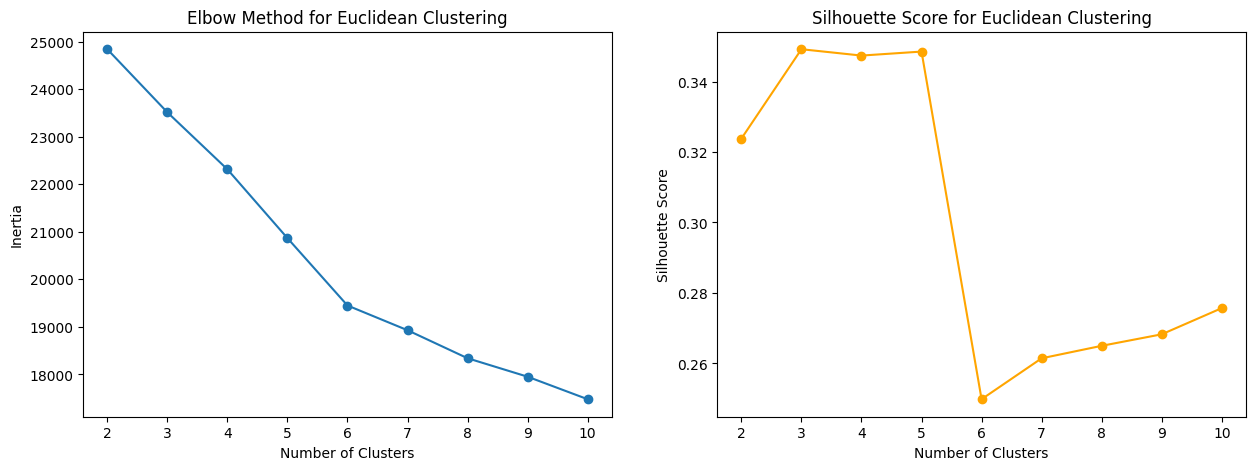

Davies-Bouldin Index for Euclidean Clustering: [1.3144750450487535, 1.4567542564065181, 1.5134515460495779, 1.3769392332266885, 1.4249973436392291, 1.34408338535116, 1.351735796265912, 1.3453391204420255, 1.5069071066522919]
Calinski-Harabasz Index for Euclidean Clustering: [3191.7626667233617, 2329.6291511992745, 2015.2236760803946, 1874.1027370051086, 1800.4954414432325, 1730.6620616902078, 1653.4880811954918, 1567.0823853663387, 1510.1861067786535]
Optimal jumlah cluster untuk Euclidean Clustering adalah: 3


In [5]:
# Evaluasi Euclidean Clustering
print("Evaluating Euclidean Clustering...")
evaluate_clustering(scaled_df.values, AgglomerativeClustering, "Euclidean Clustering")


Bagian 6: Evaluasi Hierarchical Clustering

Evaluating Hierarchical Clustering...


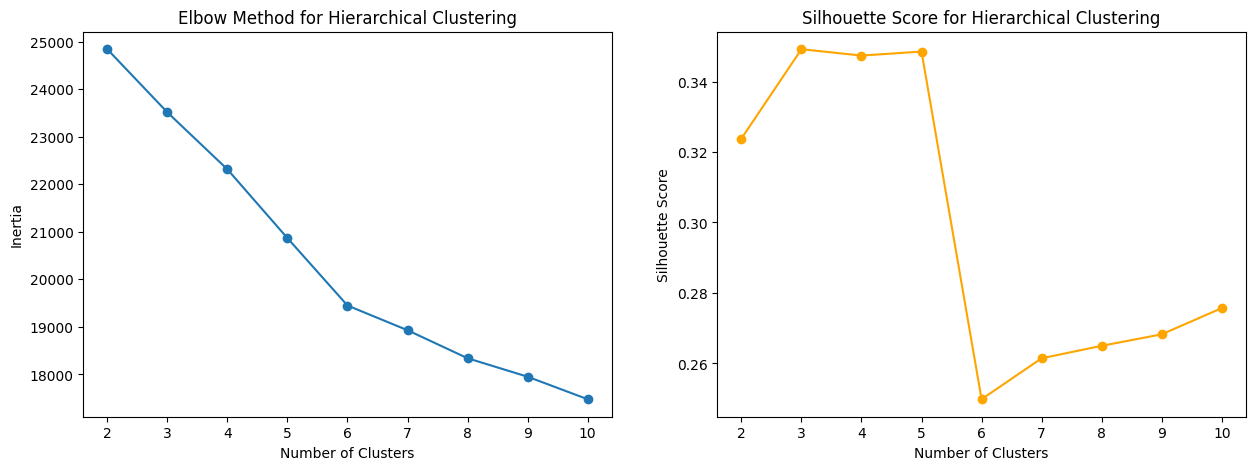

Davies-Bouldin Index for Hierarchical Clustering: [1.3144750450487535, 1.4567542564065181, 1.5134515460495779, 1.3769392332266885, 1.4249973436392291, 1.34408338535116, 1.351735796265912, 1.3453391204420255, 1.5069071066522919]
Calinski-Harabasz Index for Hierarchical Clustering: [3191.7626667233617, 2329.6291511992745, 2015.2236760803946, 1874.1027370051086, 1800.4954414432325, 1730.6620616902078, 1653.4880811954918, 1567.0823853663387, 1510.1861067786535]
Optimal jumlah cluster untuk Hierarchical Clustering adalah: 3


In [6]:
# Evaluasi Hierarchical Clustering
print("Evaluating Hierarchical Clustering...")
evaluate_clustering(scaled_df.values, AgglomerativeClustering, "Hierarchical Clustering")
